In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import pandas as pd
# import some data to play with
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [2]:
# Get the feature names
feature_names = iris.feature_names
print("Feature Names:", feature_names)

# Get the class names
class_names = iris.target_names
print("Class Names:", class_names)

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Class Names: ['setosa' 'versicolor' 'virginica']


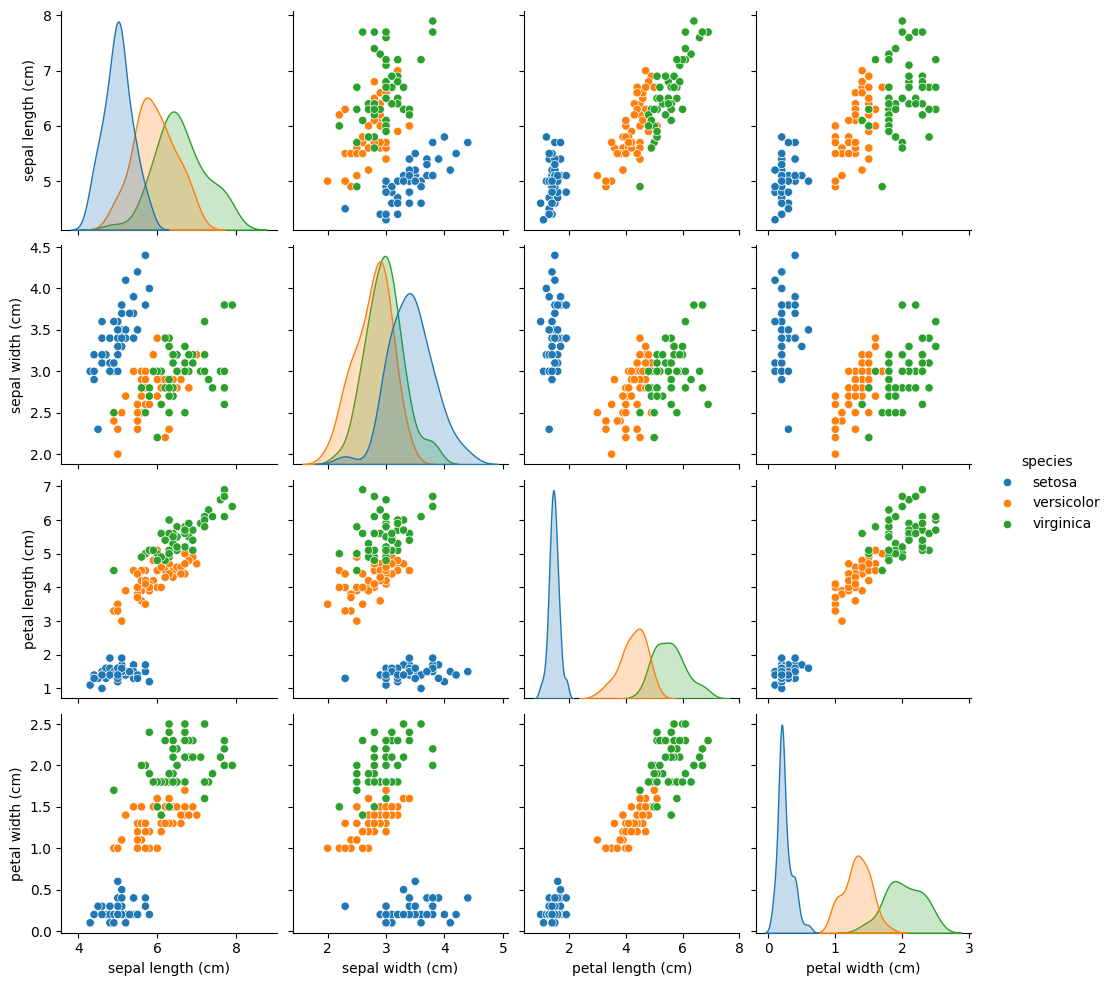

In [3]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

# Create a Seaborn pairplot
sns.pairplot(data=iris_df, diag_kind='kde', hue='species')
plt.show()

In [16]:
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X,Y

(array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2],
        [4.6, 3.1],
        [5. , 3.6],
        [5.4, 3.9],
        [4.6, 3.4],
        [5. , 3.4],
        [4.4, 2.9],
        [4.9, 3.1],
        [5.4, 3.7],
        [4.8, 3.4],
        [4.8, 3. ],
        [4.3, 3. ],
        [5.8, 4. ],
        [5.7, 4.4],
        [5.4, 3.9],
        [5.1, 3.5],
        [5.7, 3.8],
        [5.1, 3.8],
        [5.4, 3.4],
        [5.1, 3.7],
        [4.6, 3.6],
        [5.1, 3.3],
        [4.8, 3.4],
        [5. , 3. ],
        [5. , 3.4],
        [5.2, 3.5],
        [5.2, 3.4],
        [4.7, 3.2],
        [4.8, 3.1],
        [5.4, 3.4],
        [5.2, 4.1],
        [5.5, 4.2],
        [4.9, 3.1],
        [5. , 3.2],
        [5.5, 3.5],
        [4.9, 3.6],
        [4.4, 3. ],
        [5.1, 3.4],
        [5. , 3.5],
        [4.5, 2.3],
        [4.4, 3.2],
        [5. , 3.5],
        [5.1, 3.8],
        [4.8, 3. ],
        [5.1, 3.8],
        [4.6, 3.2],
        [5.3, 3.7],
        [5. , 3.3],


Accuracy: 0.9
Precision: 0.9013888888888889
Recall: 0.9
F1-Score: 0.8992327365728899
Confusion Matrix:
 [[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


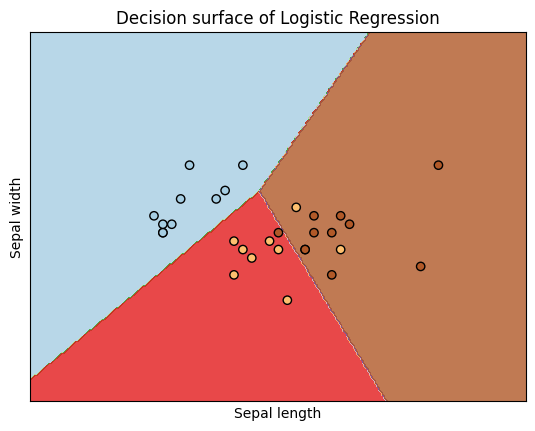

In [17]:
# Create an instance of Logistic Regression Classifier and fit the training data.
logreg = LogisticRegression()
# Performace may different based on the solvers, see
# logreg = LogisticRegression(C=1e5)
# logreg = LogisticRegression(solver='sag', max_iter=100, random_state=42,multi_class='multinomial')
logreg.fit(X_train, y_train)

# Calculate predicted labels on the test set
y_pred = logreg.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

# Create a meshgrid to plot the decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain predictions for each point in the meshgrid
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a contour plot for the decision boundary
plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors="k", cmap=plt.cm.Paired)

plt.title("Decision surface of Logistic Regression")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.xticks(())
plt.yticks(())

plt.show()

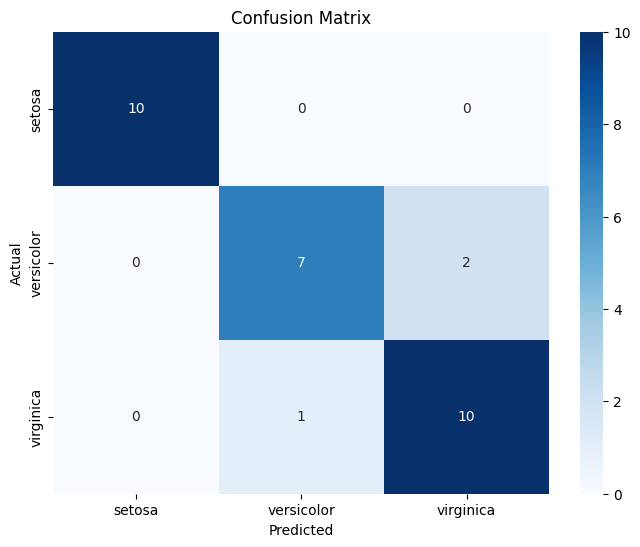

In [18]:
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
class_names = iris.target_names
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

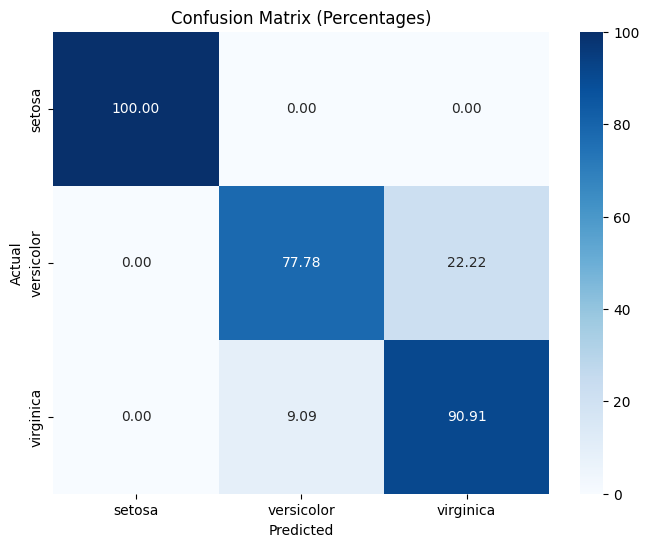

In [19]:
# Calculate confusion matrix percentages
conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1, keepdims=True) * 100

# Plot confusion matrix using seaborn heatmap
class_names = iris.target_names
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Percentages)')

plt.show()

In [20]:
X = iris.data
Y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create an instance of Logistic Regression Classifier and fit the training data.
#logreg = LogisticRegression()
logreg = LogisticRegression(C=1e5)
#logreg = LogisticRegression(solver='sag', max_iter=100, random_state=42,multi_class=multi_class)
logreg.fit(X_train, y_train)

# Calculate predicted labels on the test set
y_pred = logreg.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)



Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


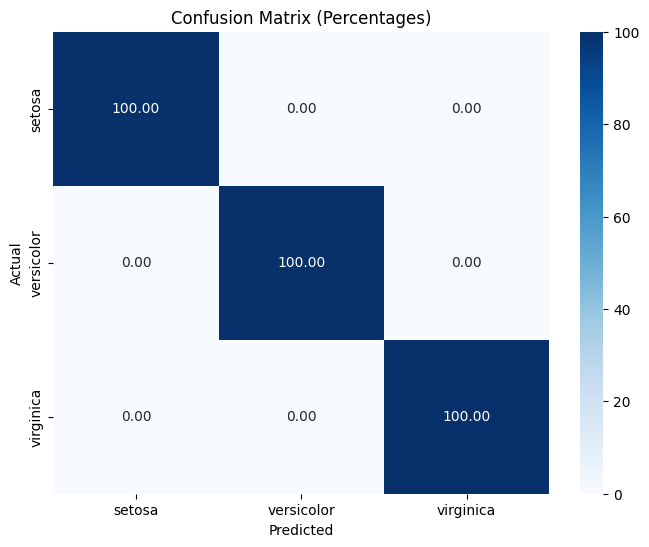

In [21]:
# Calculate confusion matrix percentages
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1, keepdims=True) * 100

# Plot confusion matrix using seaborn heatmap
class_names = iris.target_names
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Percentages)')

plt.show()

In [22]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [25]:
import pandas as pd

# Load the CSV file from the local directory
# Make sure to specify the correct path to your CSV file
df = pd.read_csv('attachment_default.csv')

# Display the first few rows of the DataFrame to verify
print(df.head())


  default student      balance        income
0      No      No   729.526495  44361.625074
1      No     Yes   817.180407  12106.134700
2      No      No  1073.549164  31767.138947
3      No      No   529.250605  35704.493935
4      No      No   785.655883  38463.495879


Text(0, 0.5, 'Income')

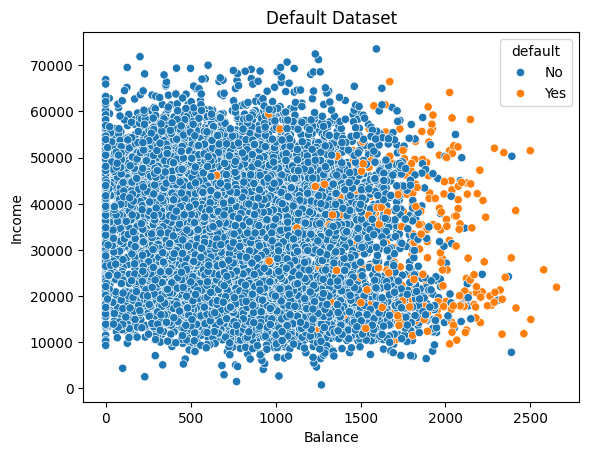

In [26]:
sns.scatterplot(x="balance", y="income", hue="default", marker='o', data=df)
plt.title('Default Dataset')
plt.xlabel('Balance')
plt.ylabel('Income')

Text(32.91790123456788, 0.5, 'Income')

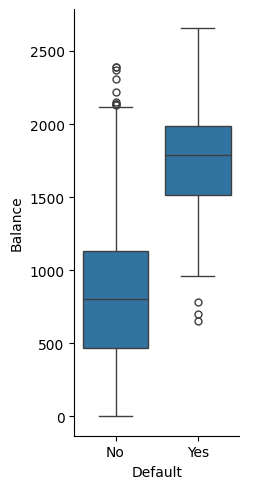

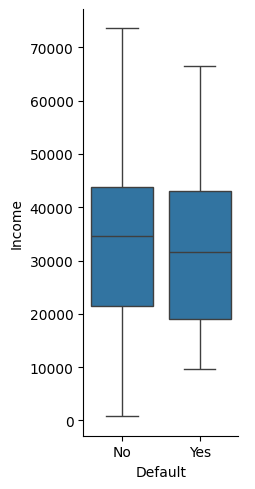

In [27]:

sns.catplot(x="default", y="balance", kind="box", aspect=0.5, data=df)
plt.xlabel('Default')
plt.ylabel('Balance')

sns.catplot(x="default", y="income", kind="box", aspect=0.5, data=df)
plt.xlabel('Default')
plt.ylabel('Income')


In [28]:
df.replace(['Yes', 'No'], [1,0], inplace=True)

y  = df[['default']]
X = sm.add_constant(df[['balance']])
print(X.head())
log_reg_sm = sm.Logit(y, X).fit()
# log_reg_sm = sm.GLM(y, X, family=sm.families.Binomial()).fit()
print(log_reg_sm.summary())

   const      balance
0    1.0   729.526495
1    1.0   817.180407
2    1.0  1073.549164
3    1.0   529.250605
4    1.0   785.655883
Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sun, 20 Oct 2024   Pseudo R-squ.:                  0.4534
Time:                        15:02:42   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------

In [29]:

y_pred = log_reg_sm.predict(X)
np.mean((y_pred > 0.5)*1 == y['default'])

0.9725

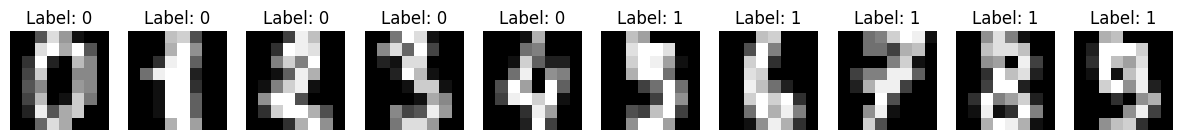

In [31]:
# Authors: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Andreas Mueller <amueller@ais.uni-bonn.de>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X, y = datasets.load_digits(return_X_y=True)



# classify small against large digits
y = (y > 4).astype(int)
#digits 0 to 4 class 0 and 5 to 9 class 1
# Display the first few images
num_images_to_display = 10
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

for i in range(num_images_to_display):
    axes[i].imshow(X[i].reshape(8, 8), cmap='gray')
    axes[i].set_title(f"Label: {y[i]}")
    axes[i].axis('off')

plt.show()

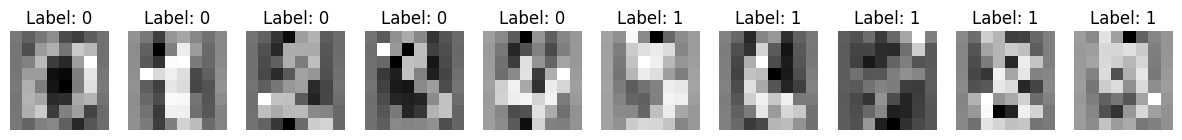

In [32]:
X = StandardScaler().fit_transform(X)
# Display the first few images
num_images_to_display = 10
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))
for i in range(num_images_to_display):
    axes[i].imshow(X[i].reshape(8, 8), cmap='gray')
    axes[i].set_title(f"Label: {y[i]}")
    axes[i].axis('off')

plt.show()

C=1.00
Sparsity with L1 penalty:                6.25%
Sparsity with Elastic-Net penalty:       4.69%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.10
Sparsity with L1 penalty:                31.25%
Sparsity with Elastic-Net penalty:       12.50%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.01
Sparsity with L1 penalty:                84.38%
Sparsity with Elastic-Net penalty:       68.75%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.86
Score with Elastic-Net penalty:          0.88
Score with L2 penalty:                   0.89


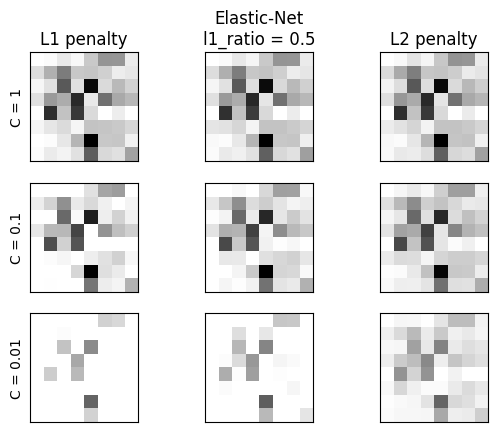

In [33]:
l1_ratio = 0.5  # L1 weight in the Elastic-Net regularization

fig, axes = plt.subplots(3, 3)

# Set regularization parameter
for i, (C, axes_row) in enumerate(zip((1, 0.1, 0.01), axes)):
    # Increase tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty="l1", tol=0.01, solver="saga")
    clf_l2_LR = LogisticRegression(C=C, penalty="l2", tol=0.01, solver="saga")
    clf_en_LR = LogisticRegression(
        C=C, penalty="elasticnet", solver="saga", l1_ratio=l1_ratio, tol=0.01
    )
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)
    clf_en_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    coef_en_LR = clf_en_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    sparsity_en_LR = np.mean(coef_en_LR == 0) * 100

    print("C=%.2f" % C)
    print("{:<40} {:.2f}%".format("Sparsity with L1 penalty:", sparsity_l1_LR))
    print("{:<40} {:.2f}%".format("Sparsity with Elastic-Net penalty:", sparsity_en_LR))
    print("{:<40} {:.2f}%".format("Sparsity with L2 penalty:", sparsity_l2_LR))
    print("{:<40} {:.2f}".format("Score with L1 penalty:", clf_l1_LR.score(X, y)))
    print(
        "{:<40} {:.2f}".format("Score with Elastic-Net penalty:", clf_en_LR.score(X, y))
    )
    print("{:<40} {:.2f}".format("Score with L2 penalty:", clf_l2_LR.score(X, y)))

    if i == 0:
        axes_row[0].set_title("L1 penalty")
        axes_row[1].set_title("Elastic-Net\nl1_ratio = %s" % l1_ratio)
        axes_row[2].set_title("L2 penalty")

    for ax, coefs in zip(axes_row, [coef_l1_LR, coef_en_LR, coef_l2_LR]):
        ax.imshow(
            np.abs(coefs.reshape(8, 8)),
            interpolation="nearest",
            cmap="binary",
            vmax=1,
            vmin=0,
        )
        ax.set_xticks(())
        ax.set_yticks(())

    axes_row[0].set_ylabel("C = %s" % C)

plt.show()

- The sparsity for each model is calculated as the percentage of coefficients that are equal to zero. This indicates how many features were effectively eliminated from the model by L1 regularization.

Sparsity with L1 penalty: 77.02%
Test score with L1 penalty: 0.8320
Example run in 23.024 s


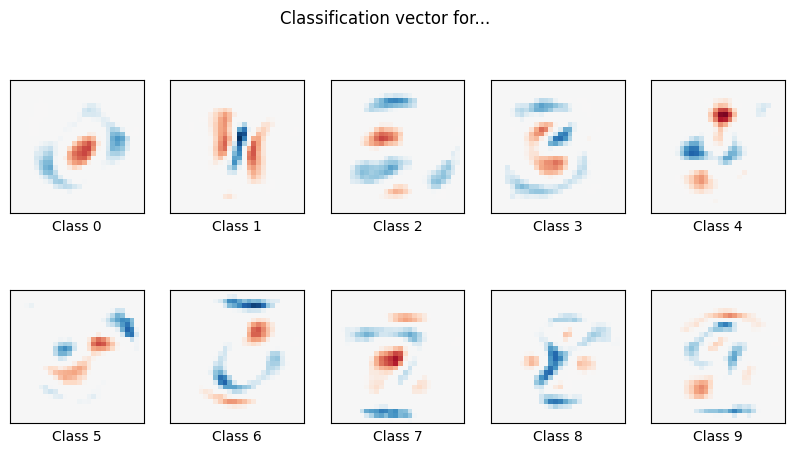

In [34]:
# Author: Arthur Mensch <arthur.mensch@m4x.org>
# License: BSD 3 clause

import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
#X, y = fetch_openml(
 #   "mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas"
#)
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)


random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)
plt.show()

Example run in 158.508 s


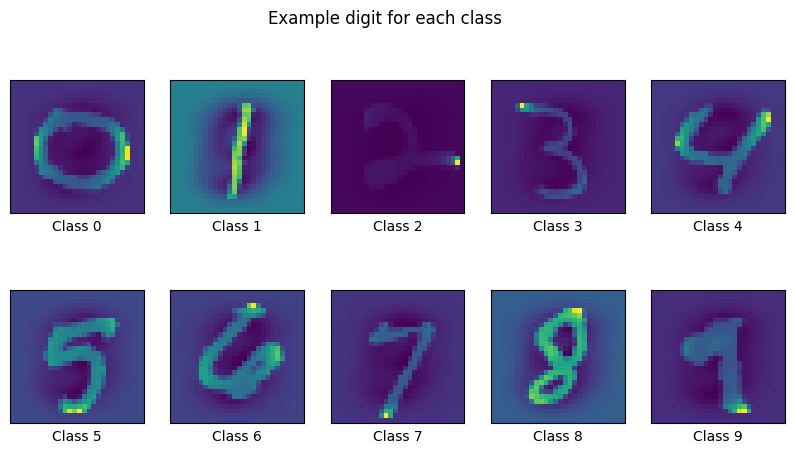

In [35]:
plt.figure(figsize=(10, 5))
for i in range(10):
    sample_idx = np.argmax(y_train == str(i))  # Find the index of the first occurrence of class i in training data
    sample_digit = X_train[sample_idx].reshape(28, 28)  # Reshape to 28x28
    digit_plot = plt.subplot(2, 5, i + 1)
    digit_plot.imshow(sample_digit, )
    digit_plot.set_xticks(())
    digit_plot.set_yticks(())
    digit_plot.set_xlabel("Class %i" % i)
plt.suptitle("Example digit for each class")

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)
plt.show()

Automatically created module for IPython interactive environment
training score : 0.995 (multinomial)
Accuracy: 0.995
Precision: 0.9950149521851819
Recall: 0.995
F1-Score: 0.9950029782302106
Confusion Matrix:
 [[333   1   0]
 [  2 331   0]
 [  0   2 331]]
training score : 0.976 (ovr)
Accuracy: 0.976
Precision: 0.9760255187343221
Recall: 0.976
F1-Score: 0.975900406504065
Confusion Matrix:
 [[328   6   0]
 [ 10 316   7]
 [  0   1 332]]


c:\Users\Tuf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Tuf\AppData\Local\Temp\ipykernel_34420\4010760803.py:68: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, label=f'Class {i}',edgecolor='black', s=20)
c:\Users\Tuf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Tuf\AppData\Local\Temp\ipykernel_34420\4010760803.py:68: UserWarning: No data for col

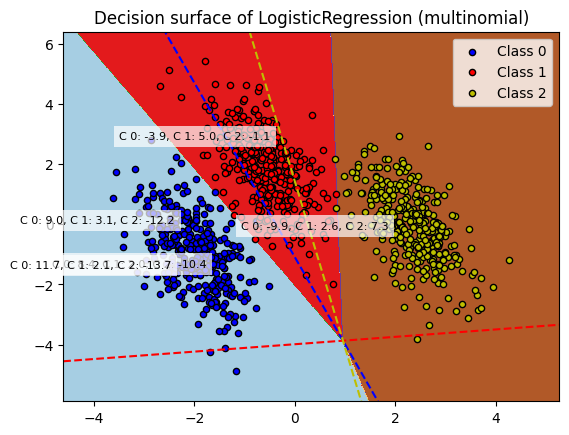

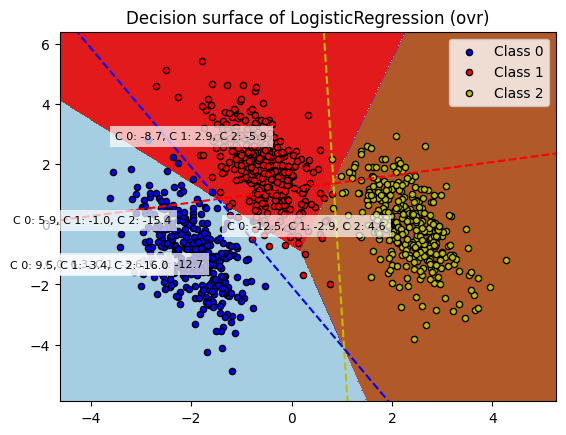

In [36]:
print(__doc__)
# Authors: Tom Dupre la Tour <tom.dupre-la-tour@m4x.org>
# License: BSD 3 clause
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html#sphx-glr-auto-examples-linear-model-plot-logistic-multinomial-py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#
# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
#By applying this transformation, the data points are projected onto a new feature space with different axes,
# which can help in better separating the classes and creating distinct decision boundaries.
X = np.dot(X, transformation)

for multi_class in ('multinomial', 'ovr'):
    clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,
                             multi_class=multi_class).fit(X, y)



    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    #plt.contourf(xx, yy, Z,colors='none' )
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    # Select a few points to annotate (e.g., first 10 points)
    num_points_to_annotate =5
    indices_to_annotate = np.arange(num_points_to_annotate)
    selected_points = X[indices_to_annotate]
    selected_labels = y[indices_to_annotate]

    # Compute decision scores for selected points
    decision_scores = clf.decision_function(selected_points)
    # Annotate points with decision scores
    for i, point in enumerate(selected_points):
      scores = decision_scores[i]
      text = ", ".join(f"C {c}: {score:.1f}" for c, score in zip(clf.classes_, scores))
      plt.annotate(text, (point[0], point[1]), fontsize=8, ha='right', color='black',
                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
    # Plot also the training points
    select_points_only=0
    colors = "bry"
    for i, color in zip(clf.classes_, colors):

        if select_points_only==1:
          idx = np.where(selected_labels == i)
          plt.scatter(selected_points[idx, 0], selected_points[idx, 1], c=color, label=f'Class {i}', edgecolor='black', s=50)
        else:
          idx = np.where(y == i)
          plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, label=f'Class {i}',edgecolor='black', s=20)


    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

        # print the training scores (accuracy)
    training_score = clf.score(X, y)
    print("training score : %.3f (%s)" % (training_score, multi_class))
    plt.legend()
    # ... (previous code)

    # Calculate predicted labels
    predicted_labels = clf.predict(X)

    # Calculate performance metrics
    accuracy = accuracy_score(y, predicted_labels)
    precision = precision_score(y, predicted_labels, average='weighted')
    recall = recall_score(y, predicted_labels, average='weighted')
    f1 = f1_score(y, predicted_labels, average='weighted')
    conf_matrix = confusion_matrix(y, predicted_labels)

    # Print metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("Confusion Matrix:\n", conf_matrix)


plt.show()









In [37]:
# Author: Arthur Mensch

import timeit
import warnings

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import logging
logging.basicConfig()

warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
t0 = timeit.default_timer()

# We use SAGA solver
solver = "saga"

# Turn down for faster run time
n_samples = 5000

warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
t0 = timeit.default_timer()

# We use SAGA solver
solver = "saga"

# Turn down for faster run time
n_samples = 5000

X, y = fetch_20newsgroups_vectorized(subset="all", return_X_y=True)
X = X[:n_samples]
y = y[:n_samples]



Dataset 20newsgroup, train_samples=4500, n_features=130107, n_classes=20
[model=One versus Rest, solver=saga] Number of epochs: 1


c:\Users\Tuf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


[model=One versus Rest, solver=saga] Number of epochs: 2


c:\Users\Tuf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


[model=One versus Rest, solver=saga] Number of epochs: 3


c:\Users\Tuf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Test accuracy for model ovr: 0.5960
% non-zero coefficients for model ovr, per class:
 [0.26593496 0.43348936 0.26362917 0.31973683 0.37815029 0.2928359
 0.27054655 0.62717609 0.19522393 0.30897646 0.34586917 0.28207552
 0.34125758 0.29898468 0.34279478 0.59489497 0.38353048 0.35278655
 0.19829832 0.14603365]
Run time (3 epochs) for model ovr:0.95
[model=Multinomial, solver=saga] Number of epochs: 1


c:\Users\Tuf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[model=Multinomial, solver=saga] Number of epochs: 2


c:\Users\Tuf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[model=Multinomial, solver=saga] Number of epochs: 5


c:\Users\Tuf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Test accuracy for model multinomial: 0.6440
% non-zero coefficients for model multinomial, per class:
 [0.36047253 0.1268187  0.10606655 0.17985197 0.5395559  0.07993421
 0.06686804 0.21443888 0.11528972 0.2075215  0.10914094 0.11144673
 0.13988486 0.09684337 0.26286057 0.11682692 0.55800226 0.17370318
 0.11452112 0.14603365]
Run time (5 epochs) for model multinomial:0.86
Example run in 339.537 s


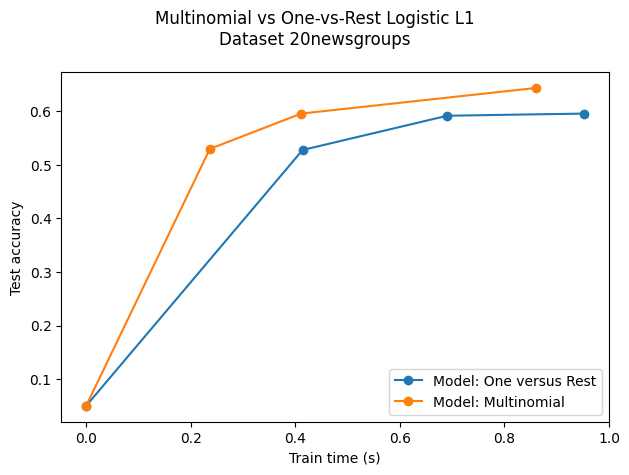

In [38]:



X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, stratify=y, test_size=0.1
)
train_samples, n_features = X_train.shape
n_classes = np.unique(y).shape[0]

print(
    "Dataset 20newsgroup, train_samples=%i, n_features=%i, n_classes=%i"
    % (train_samples, n_features, n_classes)
)

models = {
    "ovr": {"name": "One versus Rest", "iters": [1, 2, 3]},
    "multinomial": {"name": "Multinomial", "iters": [1, 2, 5]},
}

for model in models:
    # Add initial chance-level values for plotting purpose
    accuracies = [1 / n_classes]
    times = [0]
    densities = [1]

    model_params = models[model]

    # Small number of epochs for fast runtime
    for this_max_iter in model_params["iters"]:
        print(
            "[model=%s, solver=%s] Number of epochs: %s"
            % (model_params["name"], solver, this_max_iter)
        )
        lr = LogisticRegression(
            solver=solver,
            multi_class=model,
            penalty="l1",
            max_iter=this_max_iter,
            random_state=42,
        )
        t1 = timeit.default_timer()
        lr.fit(X_train, y_train)
        train_time = timeit.default_timer() - t1

        y_pred = lr.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
        density = np.mean(lr.coef_ != 0, axis=1) * 100
        accuracies.append(accuracy)
        densities.append(density)
        times.append(train_time)
    models[model]["times"] = times
    models[model]["densities"] = densities
    models[model]["accuracies"] = accuracies
    print("Test accuracy for model %s: %.4f" % (model, accuracies[-1]))
    print(
        "%% non-zero coefficients for model %s, per class:\n %s"
        % (model, densities[-1])
    )
    print(
        "Run time (%i epochs) for model %s:%.2f"
        % (model_params["iters"][-1], model, times[-1])
    )

fig = plt.figure()
ax = fig.add_subplot(111)

for model in models:
    name = models[model]["name"]
    times = models[model]["times"]
    accuracies = models[model]["accuracies"]
    ax.plot(times, accuracies, marker="o", label="Model: %s" % name)
    ax.set_xlabel("Train time (s)")
    ax.set_ylabel("Test accuracy")
ax.legend()
fig.suptitle("Multinomial vs One-vs-Rest Logistic L1\nDataset %s" % "20newsgroups")
fig.tight_layout()
fig.subplots_adjust(top=0.85)
run_time = timeit.default_timer() - t0
print("Example run in %.3f s" % run_time)
plt.show()

In [39]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, [2, 3]]  # Using petal length and petal width features
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Create a perceptron classifier
perceptron = Perceptron(max_iter=100, eta0=0.1, random_state=42)

# Train the perceptron classifier
perceptron.fit(X_train_std, y_train)

# Predict using the trained perceptron
y_pred = perceptron.predict(X_test_std)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


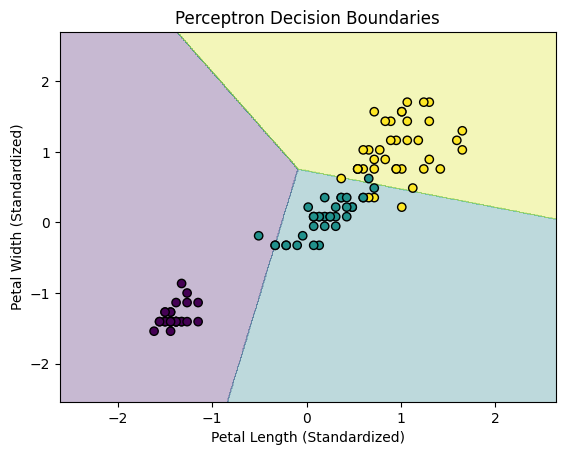

Accuracy: 1.00


c:\Users\Tuf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


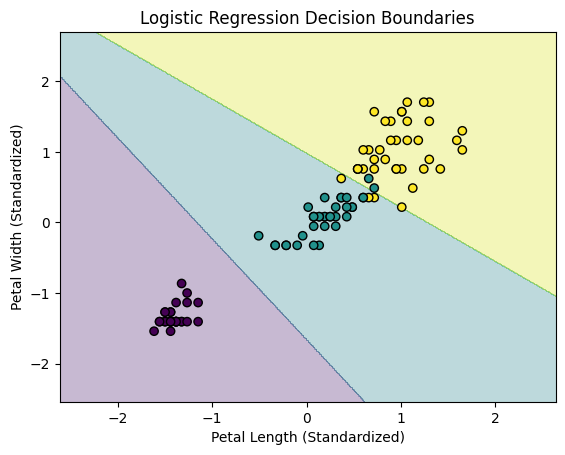

In [45]:
# Create a meshgrid to plot decision boundaries
x_min, x_max = X_train_std[:, 0].min() - 1, X_train_std[:, 0].max() + 1
y_min, y_max = X_train_std[:, 1].min() - 1, X_train_std[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries and data points
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_train, marker='o', edgecolors='black')
plt.xlabel('Petal Length (Standardized)')
plt.ylabel('Petal Width (Standardized)')
plt.title('Perceptron Decision Boundaries')
plt.show()

# Create a logistic regression classifier
#logreg = LogisticRegression(random_state=42, max_iter=1000,)
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42, max_iter=1000)

# Train the logistic regression classifier
logreg.fit(X_train_std, y_train)

# calculating the accuracy of the log reg classifier
y_pred = logreg.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Create a meshgrid to plot decision boundaries
x_min, x_max = X_train_std[:, 0].min() - 1, X_train_std[:, 0].max() + 1
y_min, y_max = X_train_std[:, 1].min() - 1, X_train_std[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries and data points
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_train, marker='o', edgecolors='black')
plt.xlabel('Petal Length (Standardized)')
plt.ylabel('Petal Width (Standardized)')
plt.title('Logistic Regression Decision Boundaries')
plt.show()



| **Aspect**                 | **Perceptron**                                  | **Logistic Regression**                           |
|----------------------------|-------------------------------------------------|--------------------------------------------------|
| **Activation Function**     | Step function (hard threshold)                  | Sigmoid function (smooth probability output)      |
| **Output**                  | Binary class label (0 or 1)                     | Probability between 0 and 1                       |
| **Loss Function**           | No explicit loss function (based on misclassifications) | Log-likelihood (cross-entropy loss)               |
| **Handling Non-linear Data**| Requires linearly separable data to work well   | Can still work with non-linearly separable data   |
| **Probability Estimates**   | Does not provide probability estimates          | Outputs probabilities for class membership       |
| **Optimization**            | Weight updates based on misclassifications      | Optimizes a loss function using gradient descent  |
| **Multiclass Support**      | Extensions are possible but not common          | Supports both binary and multiclass classification natively using multinomial extension |
| **Convergence**             | May not converge if data is not linearly separable | Always converges (with the appropriate solver)    |
